In [10]:

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner



### load up some practice data with outliers in it

In [11]:

ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features

In [12]:

ages = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)



### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

sloop: [[ 5.07793064]]
score: 0.878262470366


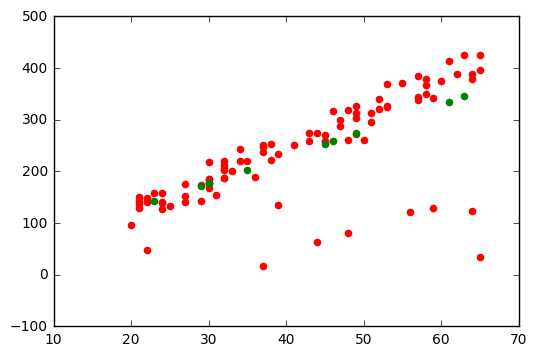

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

print "sloop:", reg.coef_

prediction = reg.predict(ages_test)
print "score:", reg.score(ages_test, net_worths_test)

plt.scatter(ages_train, net_worths_train, color='r')
plt.scatter(ages_test, prediction,color='g')
plt.show()



### Identify and remove the most outlier-y points, by using esttistic methods

In [14]:
def outlierCleaner(predictions, ages, net_worths):
    import numpy as np
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    ### your code goes here
    predictions_ = np.array([i[0] for i in predictions])
    ages_ = np.array([i[0] for i in ages])
    net_worths_ = np.array([i[0] for i in net_worths])

    error = net_worths_ - predictions_
        
    error_tmp = np.sort(error)
    
    h = len(error_tmp)/2
    q1 = np.median(error_tmp[:h])
    q3 = np.median(error_tmp[h:])
    IQR = q3 - q1
    
    lim_min = q1 - 2.1*IQR
    lim_max = q1 + 2.1*IQR
    
    mask1 = error > lim_min
    mask2 = error < lim_max
    mask = mask1 & mask2

    cleaned_predictions = predictions_[mask]
    cleaned_age = ages_[mask]
    cleaned_net_worths = net_worths_[mask]
    cleaned_error = error[mask]
    
    cleaned_data = zip(cleaned_age,cleaned_net_worths, cleaned_error)

    return cleaned_data

#predictions = reg.predict(ages_train)
#cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)


### outlier cleaner removing the 10% greater error

In [15]:
def outlierCleaner_(predictions, ages, net_worths):
    import numpy as np
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    ### your code goes here
    predictions_ = np.array([i[0] for i in predictions])
    ages_ = np.array([i[0] for i in ages])
    net_worths_ = np.array([i[0] for i in net_worths])

    error = pow(net_worths_ - predictions_,2)
      
    error_tmp = np.sort(error)
    i = int(0.9*len(error_tmp))
    lim_min = min(error_tmp[i:])
   
    
    mask = error < lim_min
    
    cleaned_predictions = predictions_[mask]
    cleaned_age = ages_[mask]
    cleaned_net_worths = net_worths_[mask]
    cleaned_error = error[mask]
    
    cleaned_data = zip(cleaned_age,cleaned_net_worths, cleaned_error)

    return cleaned_data

predictions = reg.predict(ages_train)
cleaned_data = outlierCleaner_(predictions, ages_train, net_worths_train)

ages, net_worths, errors = zip(*cleaned_data)
ages = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

print len(ages)
plt.scatter(ages, net_worths)
#plt.show()


81


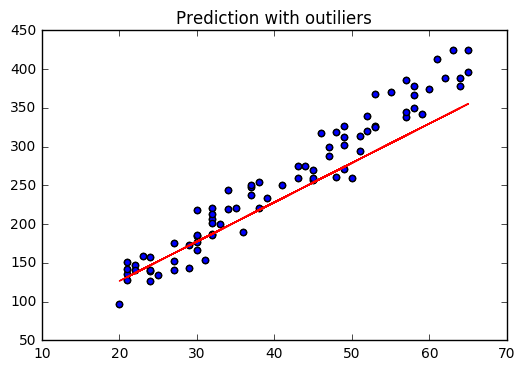

In [16]:

try:
    plt.plot(ages, reg.predict(ages), color="r")
except NameError:
    pass

plt.scatter(ages, net_worths)
plt.title("Prediction with outiliers")
plt.show()


### Call function outlierCleaner 
#### Only run this code if cleaned_data is returning data

In [17]:

cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner_(predictions, ages_train, net_worths_train) 
    
    print "size cleaned data:", len(cleaned_data)
    
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

size cleaned data: 81


slop: [[ 6.36859481]]
Score: 0.983189455396


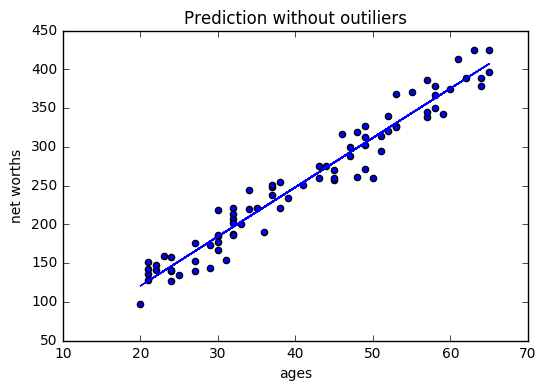

In [18]:
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        
        print "slop:", reg.coef_
        print "Score:", reg.score(ages_test,net_worths_test)
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.title("Prediction without outiliers")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

